# Fourth Task
* Prediction using Decision tree Algorithm

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt 
import os
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Getting Data 

In [2]:
df=pd.read_csv("iris.csv") #Loading the dataset

## Data Analysis

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info() # General information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.describe() #Statistical description about the dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


## Model Building

In [8]:
X=df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
scaler=StandardScaler()
x=scaler.fit_transform(X)

In [9]:
species_enc= LabelEncoder() #Encoding the Species feature 
df['Target']=species_enc.fit_transform(df[["Species"]])
y=df['Target']

C:\Users\aditr\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [10]:
xtrain, xtest, ytrain, ytest=train_test_split(x, y, test_size=0.2, random_state=0) #splitting the data for training and testing purpose

In [11]:
reg=DecisionTreeClassifier(max_depth=11)
reg.fit(xtrain, ytrain)
reg.score(xtest, ytest)

1.0

In [12]:
df['pred']=reg.predict(x)

In [13]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Target,pred
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0,0
...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2,2


## Visualization

In [14]:
from sklearn.tree import plot_tree

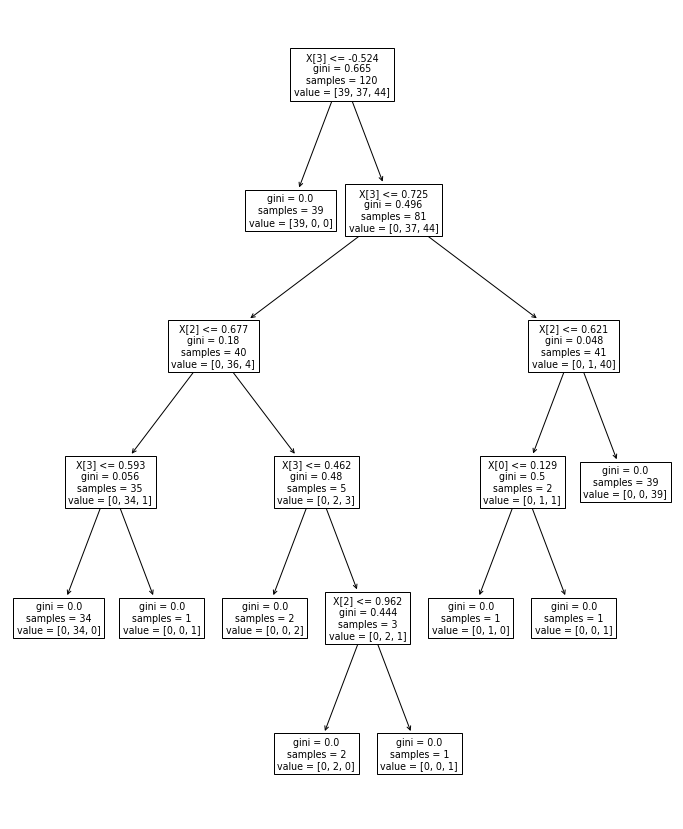

In [15]:
plt.figure(figsize=(12,15))
plot_tree(reg)
plt.show()

## Accuracy

In [16]:
pred=reg.predict(xtest)
accuracy_score(pred, ytest)

1.0

In [17]:
df['Predictions'] = [list(df['Species'].unique())[int(i)] for i in reg.predict(x)] #reversing the encoding

## Final dataset with predictions

In [18]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Target,pred,Predictions
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0,0,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0,0,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0,0,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0,0,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0,0,Iris-setosa
...,...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2,2,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2,2,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2,2,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2,2,Iris-virginica
